In [699]:
from IPython.display import Image
import os
import pandas as pd
import numpy as np
np.random.seed(42)

In [700]:
data_directory = os.path.join(os.getcwd(), 'dataset_diabetes')

In [701]:
diabetes = pd.read_csv(os.path.join(data_directory, 'diabetic_data_train.csv'))

In [702]:
pd.set_option('display.max_columns', None)

In [703]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,81844290,94788,Caucasian,Female,[70-80),?,1,1,7,4,?,InternalMedicine,48,0,11,0,0,0,276,402,428,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,396159158,135023315,Caucasian,Male,[50-60),?,1,1,7,1,BC,?,42,0,5,0,0,0,427,250,278,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
2,31258956,18397782,Caucasian,Male,[80-90),?,1,1,7,4,?,?,44,0,10,0,0,0,599,788,599,7,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,210691074,67509558,Caucasian,Male,[80-90),?,1,3,7,3,MC,?,54,0,8,0,0,0,331,309,331,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,104902980,23272362,AfricanAmerican,Female,[70-80),?,1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [704]:
diabetes['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [705]:
diabetes.replace('?', np.NaN, inplace=True)

In [706]:
diabetes.drop(['weight', 'payer_code', 'encounter_id', 'patient_nbr', 'medical_specialty',
              'admission_source_id', 'admission_type_id', 'number_outpatient', 'number_emergency'],
              axis=1, inplace=True)

In [707]:
diabetes.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [708]:
corr = diabetes.corr()

In [709]:
corr['time_in_hospital']

discharge_disposition_id    0.166128
time_in_hospital            1.000000
num_lab_procedures          0.317857
num_procedures              0.191644
num_medications             0.463739
number_inpatient            0.069721
number_diagnoses            0.213133
Name: time_in_hospital, dtype: float64

In [710]:
#fix diag_1, diag_2 and diag_3

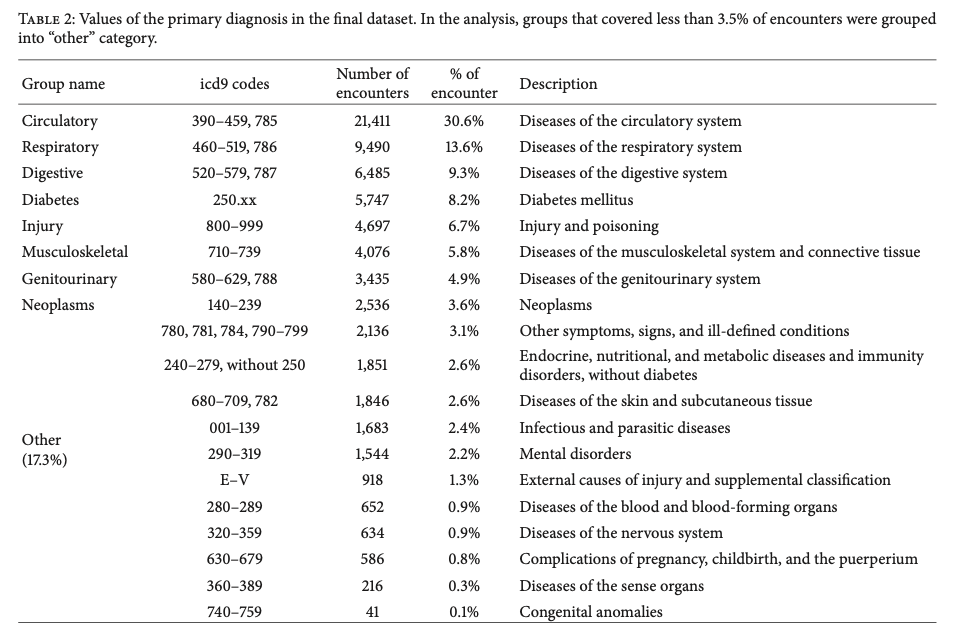

In [711]:
Image(os.path.join(os.getcwd(), 'images', 'primary_diagnoses.png'))

In [712]:
#df["First season"] = df["First season"].apply(lambda x : 1 if x > 1990)
#diabetes['diag_1'] = diabetes['diag_1'].apply(lambda x:'Test' if x in list(map(str,list(range(500,1000)))) else x)

In [713]:
def int_to_str_list(l, h):
    return list(map(str,list(range(l,h))))

In [714]:
#diabetes['diag_1'].unique()
circulatory = int_to_str_list(390,460) + ['785']
respiratory = int_to_str_list(460,520) + ['786']
digestive = int_to_str_list(520,580) + ['787']
injury = int_to_str_list(800,1000)
# diabetes = int(x) == 250
musculoskeletal =int_to_str_list(710,740)
genitourinary = int_to_str_list(580,630) + ['788']
neoplasms = int_to_str_list(140, 240)
not_others = ['Circulatory', 'Respiratory', 'Digestive', 'Injury', 'Diabetes', 'Musculoskeletal', 'Genitourinary',
             'Neoplasms']

In [715]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    diabetes[col] = diabetes[col].apply(lambda x:'Circulatory' if x in circulatory else x)
    diabetes[col] = diabetes[col].apply(lambda x:'Respiratory' if x in respiratory else x)
    diabetes[col] = diabetes[col].apply(lambda x:'Digestive' if x in digestive else x)
    diabetes[col] = diabetes[col].apply(lambda x:'Injury' if x in injury else x)
    diabetes[col] = diabetes[col].apply(lambda x:'Diabetes' if x.isdigit() and int(x) == 250 else x)
    diabetes[col] = diabetes[col].apply(lambda x:'Musculoskeletal' if x in musculoskeletal else x)
    diabetes[col] = diabetes[col].apply(lambda x:'Genitourinary' if x in genitourinary else x)
    diabetes[col] = diabetes[col].apply(lambda x:'Neoplams' if x in neoplams else x)
    diabetes[col] = diabetes[col].apply(lambda x: 'Others' if x not in not_others else x)

In [716]:
diabetes['diag_1'].value_counts()

Circulatory        23792
Others             22966
Respiratory        11183
Digestive           7310
Injury              5276
Genitourinary       4015
Musculoskeletal     3747
Diabetes             157
Name: diag_1, dtype: int64

In [717]:
diabetes['diag_2'].value_counts()

Others             27798
Circulatory        24833
Respiratory         8466
Genitourinary       6576
Diabetes            4311
Digestive           3218
Injury              1890
Musculoskeletal     1354
Name: diag_2, dtype: int64

In [718]:
diabetes['diag_3'].value_counts()

Others             28800
Circulatory        23623
Diabetes            9000
Respiratory         5732
Genitourinary       5234
Digestive           3065
Injury              1514
Musculoskeletal     1478
Name: diag_3, dtype: int64

In [719]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78446 entries, 0 to 81411
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      78446 non-null  object
 1   gender                    78446 non-null  object
 2   age                       78446 non-null  object
 3   discharge_disposition_id  78446 non-null  int64 
 4   time_in_hospital          78446 non-null  int64 
 5   num_lab_procedures        78446 non-null  int64 
 6   num_procedures            78446 non-null  int64 
 7   num_medications           78446 non-null  int64 
 8   number_inpatient          78446 non-null  int64 
 9   diag_1                    78446 non-null  object
 10  diag_2                    78446 non-null  object
 11  diag_3                    78446 non-null  object
 12  number_diagnoses          78446 non-null  int64 
 13  max_glu_serum             78446 non-null  object
 14  A1Cresult             

In [720]:
from sklearn.impute import SimpleImputer

In [721]:
imputer = SimpleImputer(strategy='median')

In [722]:
diabetes_num = diabetes._get_numeric_data()
imputer.fit(diabetes_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [723]:
imputer.statistics_

array([ 1.,  4., 44.,  1., 15.,  0.,  8.])

In [724]:
diabetes_num

,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses
0,1,4,48,0,11,0,9
1,1,1,42,0,5,0,6
2,1,4,44,0,10,0,7
3,3,3,54,0,8,0,8
4,11,11,35,3,23,1,8
...,...,...,...,...,...,...,...
81407,1,2,35,0,12,0,9
81408,1,5,63,2,23,0,9
81409,3,3,55,1,33,0,9
81410,25,12,77,2,21,0,9


In [725]:
diabetes_num.describe()

,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses
count,78446.000000,78446.000000,78446.000000,78446.000000,78446.000000,78446.000000,78446.000000
mean,3.755756,4.429875,43.130013,1.348902,16.108406,0.647987,7.510632
std,5.319711,3.002682,19.777399,1.707596,8.101879,1.275597,1.833703
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000
25%,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,6.000000
50%,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,8.000000
75%,4.000000,6.000000,57.000000,2.000000,20.000000,1.000000,9.000000
max,28.000000,14.000000,132.000000,6.000000,81.000000,19.000000,16.000000


In [726]:
np.median(diabetes['time_in_hospital'])

4.0

In [727]:
arr = diabetes['time_in_hospital']
arr

0         4
1         1
2         4
3         3
4        11
         ..
81407     2
81408     5
81409     3
81410    12
81411     1
Name: time_in_hospital, Length: 78446, dtype: int64

In [728]:
arr.describe()

count    78446.000000
mean         4.429875
std          3.002682
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

In [729]:
diabetes['time_in_hospital_binned'] = pd.qcut(diabetes['time_in_hospital'], q=4)

In [730]:
diabetes['time_in_hospital_binned'].unique()

[(2.0, 4.0], (0.999, 2.0], (6.0, 14.0], (4.0, 6.0]]
Categories (4, interval[float64]): [(0.999, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 14.0]]

In [731]:
corr = diabetes.corr()

In [732]:
diabetes

,race,gender,age,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,time_in_hospital_binned
0,Caucasian,Female,[70-80),1,4,48,0,11,0,Others,Circulatory,Circulatory,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,"(2.0, 4.0]"
1,Caucasian,Male,[50-60),1,1,42,0,5,0,Circulatory,Diabetes,Others,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30,"(0.999, 2.0]"
2,Caucasian,Male,[80-90),1,4,44,0,10,0,Genitourinary,Genitourinary,Genitourinary,7,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,"(2.0, 4.0]"
3,Caucasian,Male,[80-90),3,3,54,0,8,0,Others,Others,Others,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,"(2.0, 4.0]"
4,AfricanAmerican,Female,[70-80),11,11,35,3,23,1,Others,Respiratory,Circulatory,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,"(6.0, 14.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,Caucasian,Male,[70-80),1,2,35,0,12,0,Respiratory,Circulatory,Circulatory,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30,"(0.999, 2.0]"
81408,Caucasian,Male,[60-70),1,5,63,2,23,0,Others,Others,Others,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,"(4.0, 6.0]"
81409,Caucasian,Male,[70-80),3,3,55,1,33,0,Musculoskeletal,Circulatory,Others,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,"(2.0, 4.0]"
81410,Caucasian,Female,[60-70),25,12,77,2,21,0,Respiratory,Respiratory,Genitourinary,9,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,"(6.0, 14.0]"


In [733]:
d_cat = diabetes.select_dtypes(include=['category','object'])

In [734]:
d_cat_encoded = pd.get_dummies(d_cat)

In [735]:
d_cat_encoded

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Others,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Others,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Others,diag_3_Respiratory,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO,"time_in_hospital_binned_(0.999, 2.0]","time_in_hospital_binned_(2.0, 4.0]","time_in_hospital_binned_(4.0, 6.0]","time_in_hospital_binned_(6.0, 14.0]"
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [736]:
diabetes_prepared = pd.concat([diabetes_num, d_cat_encoded], axis=1)

In [738]:
#repeat whatever you did till now again with readmission rates/time in hospital as labels. Also use sklearn.pipeline
#to modularize all feature engineering steps